# How to Calculate Gradients with  PyTorch




In this sesion we will explore the autograd package of pytorch, how to perform automatic differentiation with it and how it is usefull for Deep learning models. 


Some concepts we will se: 

* The "grad" attribute a tensor..
* How to build a dynamic computational graph (DCG).
* The method ".backward()".

In [ ]:
###  Lets import the package for this session  
import torch


In [ ]:
# lets initialize a tensor 
# attribute requires_grad enable gradients to be calculated
a = torch.randn((3,3), requires_grad=True)


## Lets create this computation graph

![img](https://algorithmia.com/blog/wp-content/uploads/2018/05/pytorch-3.jpg) 

In [ ]:
a = torch.randn((3), requires_grad=True)  # input
b = torch.randn((3), requires_grad=True)  # input

c = a+b
d = b+1

e = c*d                                   # output 
print(e)

tensor([ 1.0532, -0.1366, -0.2041], grad_fn=<MulBackward0>)


In [ ]:
# The tensor class has several attributes related how calculate gradients
# .requires_grad= True/False    enable tracking of gradients
#  .grad_fn= <functions>        saving the parent function that generates the variable
# .backward()                   Calculates the gradients respect to its variables
# .grad                         attribute where the gradient is stored.

In [ ]:
print(e.grad_fn)
print(e.grad)

# What is the warning telling us.?


None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  


# What is a leaf?

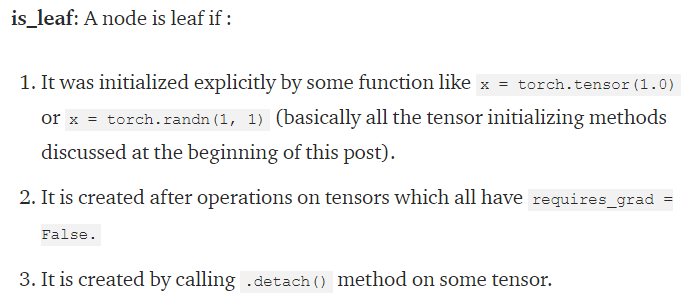

So, lets look closer to this computational graph



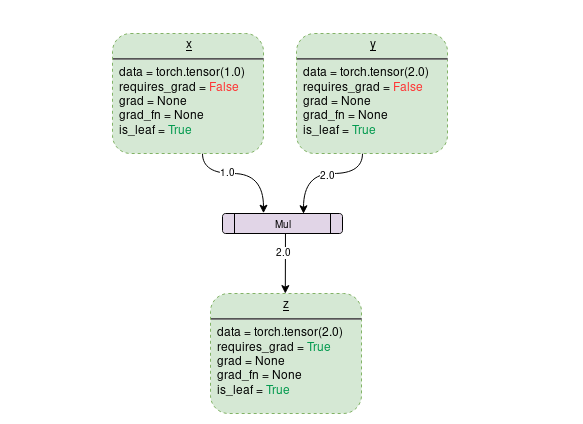

In [ ]:
x=torch.tensor(1.,requires_grad=False)
y=torch.tensor(2.,requires_grad=False)
z=x*y
print(z)

tensor(2.)


In [ ]:
print(z.requires_grad)
# So, derivatives are not being tracked now

False


In [ ]:
print(z.is_leaf)

True


In [ ]:
## Lets set the requires_grad=True
x.requires_grad=True
y.requires_grad=True
print(x.requires_grad)
print(y.requires_grad)

True
True


In [ ]:
# Lets compute again the graph, and now see what changes.
z = x*y
print(z)
print(z.requires_grad)

tensor(2., grad_fn=<MulBackward0>)
True


In [ ]:
# What about the gradients for X
print(x.requires_grad)
print(x.grad)

True
None


In [ ]:
# What about the gradients for Y
print(y.requires_grad)
print(y.grad)

True
None


In [ ]:
# Lets calculate the gradients!
z.backward()

In [ ]:
print(x.grad)
print(y.grad) 
# well.. Was these the results expected?

# yOU BET your ass it was

tensor(2.)
tensor(1.)


In [ ]:
# TODO:   Now create the same graph but for tensors with shape 3x3 with values from a gaussian distribution, and tracking gradients for y
x3=torch.tensor(torch.randn(3,3),requires_grad=False)
y3=torch.tensor(torch.randn(3,3),requires_grad=True)
z3 = x3*y3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# TODO: Compute gradients for y
z3.backward

<bound method Tensor.backward of tensor([[ 0.3526, -0.4749, -0.2774],
        [-0.1269, -0.0962, -0.9044],
        [ 1.6852,  1.1099,  0.8229]], grad_fn=<MulBackward0>)>

If you got an error, that was expected. The method .backward() only works for scalars. 
you have to specified an external tensor, to terminate the chain rule, with the proper dimmention   
If you manage to do it, keep going!!! Congrats!! 

In [ ]:
# Compute the gradients again and see what happend.
z3.backward(torch.ones(3,3))

When the forward and backward computation is done, the DCG is remove. 

So, you have to explicitly set 'retain_graph=True' in order to Pytorch keeps the DCG for you.


In [ ]:
x=torch.randn((3,3),requires_grad=False)
y=torch.randn((3,3),requires_grad=True)
z=x*y
print(z)

# TODO: Compute backward twice
z.backward(torch.ones(3,3), retain_graph=True)
z.backward(torch.ones(3,3))

tensor([[-0.3850, -2.3747, -1.6089],
        [-0.1159,  0.4464,  0.1322],
        [ 0.3267,  0.0031,  0.8089]], grad_fn=<MulBackward0>)


# The method .detach() is used to remove the variable from the DCG.

In [ ]:
print(y.requires_grad)
y.requires_grad=False
print(y.requires_grad)

# Lets set it again to true, and, create another tensor from it.
y.requires_grad=True

B = y
print(B)  # now B has the same value as y and also with the requires_grad=True

# Use detach() to remove from the DCG

B = y.detach()
print(B)  # now B has the same value as y is not in the DCG

#Another method is torch.no_grad()

with torch.no_grad():
  # no gradients are calculate, no grad_fn is stored.
  C = y + 2
  print('Inside Torch.no_grad()')
  print(C)


True
False
tensor([[ 0.4803,  1.2748, -2.1319],
        [ 0.5403,  0.3382, -0.1276],
        [-1.2493,  0.0885, -0.4516]], requires_grad=True)
tensor([[ 0.4803,  1.2748, -2.1319],
        [ 0.5403,  0.3382, -0.1276],
        [-1.2493,  0.0885, -0.4516]])
Inside Torch.no_grad()
tensor([[ 2.4803,  3.2748, -0.1319],
        [ 2.5403,  2.3382,  1.8724],
        [ 0.7507,  2.0885,  1.5484]])


## Accumulation of gradient effects

In [ ]:
## lets see the accumulation effect.

x = torch.tensor(3.,requires_grad=True)
for epoch in range(3):
  y = 3*x**2 + 2*x + 5
  y.backward()
  
  print(f'Backward at epoch: {epoch} produce gradient {x.grad}')

  # TODO.. Setup grad.zero_() and see what happens.
  # Toggling grad.zero_() ON keeps the gradient the same (20) for each iteration.
  # Otherwise yields 20, 40, 60
  x.grad.zero_()
  

Backward at epoch: 0 produce gradient 20.0
Backward at epoch: 1 produce gradient 20.0
Backward at epoch: 2 produce gradient 20.0


In [ ]:
# Lets create our first perceptron  
# y = wx + b

w = torch.randn((10,1),requires_grad=True)  
b = torch.zeros(1, requires_grad=True)
print(w)
print(b)

x= torch.rand(1,10)                         # The input features (10 features)

y = x@w + b                                 ## @ is another mode to calculate the matrix multiplication

print(y)                                   ## this was the forward()

tensor([[ 0.2873],
        [-1.0444],
        [ 0.2757],
        [-1.0190],
        [ 0.7293],
        [-2.4062],
        [-0.7713],
        [ 0.3269],
        [ 1.1236],
        [ 1.5606]], requires_grad=True)
tensor([0.], requires_grad=True)
tensor([[0.1070]], grad_fn=<AddBackward0>)


In [ ]:
loss = 1.0 - y  
#TODO: compute the gradientes
print(loss)
loss.backward()

tensor([[0.8930]], grad_fn=<RsubBackward1>)


In [ ]:
#TODO:  Get the gradients of the model.
print(w.grad)
print(b.grad)

tensor([[-0.1242],
        [-0.7139],
        [-0.4943],
        [-0.8479],
        [-0.9402],
        [-0.3134],
        [-0.6779],
        [-0.4335],
        [-0.3739],
        [-0.2165]])
tensor([-1.])


In [ ]:
print(w)
print(b)

tensor([[ 1.6472],
        [-1.0280],
        [ 1.4445],
        [ 2.9147],
        [-1.6109],
        [-0.8280],
        [-0.9320],
        [-0.2713],
        [-0.4668],
        [-0.6699]], requires_grad=True)
tensor([0.], requires_grad=True)


In [ ]:
# TODO: Update the weights of the model using the gradients of the model

learning_rate= 1e-3

with torch.no_grad():
  w = w + (w.grad) * learning_rate
  b = b + (b.grad) * learning_rate
  # ...

print(w)
print(b)

tensor([[ 1.6470],
        [-1.0287],
        [ 1.4440],
        [ 2.9139],
        [-1.6118],
        [-0.8284],
        [-0.9327],
        [-0.2717],
        [-0.4672],
        [-0.6701]])
tensor([-0.0010])


In [ ]:
#TODO: Calculate another forward pass with the model updated.
y = x@w + b                                 ## @ is another mode to calculate the matrix multiplication

print(y)                                   ## this was the forward()
print(loss)

tensor([[-0.1910]])
tensor([[1.1867]], grad_fn=<RsubBackward1>)


Summary

We have seen the autograd function of pytorch and how allow us to calculate gradients from a Dynamic Computation Graph. 



### References

[1] https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

[2] https://towardsdatascience.com/pytorch-autograd-understanding-the-heart-of-pytorchs-magic-2686cd94ec95

[3] https://ml-cheatsheet.readthedocs.io/en/latest/backpropagation.html